In [1]:
import xgboost

print(xgboost.__version__)

1.5.2


In [2]:
# 위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성값 기반
# 악성 종양인지 양성 종양인지를 분류한 데이터 세트 
# 악성 종양 : 주위 조직에 침입하면서 빠르게 성장하고 신체 각 부위에 확산되거나 전이되어 생명을 위협
# 양성 종양 : 비교적 성장 속도가 느리고 전이되지 않음

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
# 1: 양성(benigns)
# 0: 악성(malignant)
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
# 파이썬 XGboost는 학습용과 테스트 데이터 세트를 위해 별도의 객체인 DMatrix를 생성
# 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
# XGboost의 주요파라미터는 data와 label이다. 

In [13]:
type(X_test)

numpy.ndarray

In [14]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [16]:
type(dtest)

xgboost.core.DMatrix

In [18]:
# XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력
# max_depth(트리 최대 깊이)
# eta(학습률) - 사이킷런에서는 learning_rate
# objective(분류 이므로 이진 로지스틱, binary:logistic)
# eval_metric (오류 함수의 평가 성능 지표)
# early_stoppings (중단 파라미터)
# num_rounds (부스팅 반복 횟수)

params = {
  'max_depth':3,
  'eta':0.1,
  'objective':'binary:logistic',
  'eval_metric':'logloss',
  'early_stoppings':100
}
num_rounds = 400

In [19]:
# 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터 전달 
# 사이킷런의 경우 Estimator의 생성자를 하이퍼 파라미터로 전달 

In [20]:
# 조기 중단은 xgboost의 train()함수에 early_stopping_rounds 파라미터를 입력하여 설정한다.(여기서는 100)
# early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드기 eval_set과 eval_metric이 함께 설정되어야 한다.
# XGBoost는 바복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정한다. 

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=wlist)

[20:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train

In [23]:
# XGboot는 train() 함수를 호출해 학습이 완료된 모델 객체를 반환하게 된다.
# 이 모델 객체는 예측을 위해 predict() 메서드를 이용한다. 
# 한 가지 유의할 점은 사이킷런의 predcit() 메서드는 예측 결과 클래스 값(0,1)를 반환하는데 반해
# xgboost의 predcit()는 예측 결과값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환한다. 
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직을 추가한다. 

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시:", preds[:10])



predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

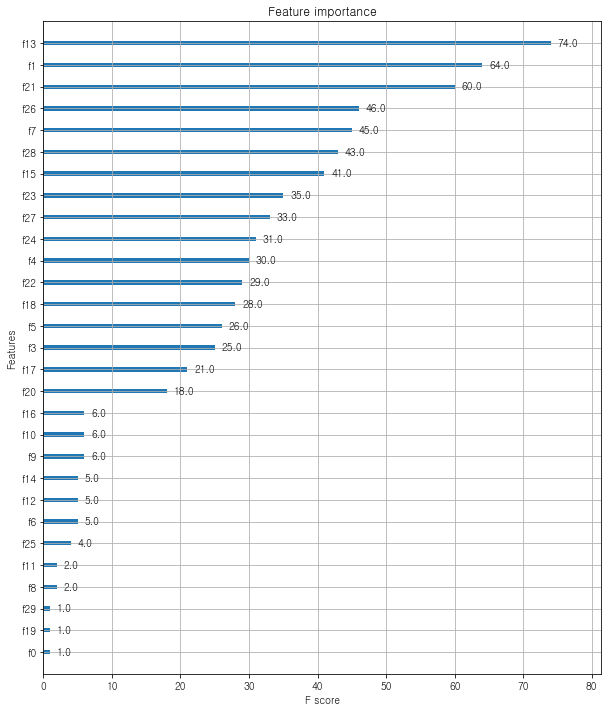

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)